# Import Libraries 

Import all the required Tensorflow and Keras libraries

In [1]:
import os as os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras import regularizers

print(tf.test.is_gpu_available())

True


Using TensorFlow backend.


 # Step 1: Design the CNN architecture. After designing the architecture, print it in iPython Notebook. 


In [2]:
# THE CODE DEFINING THE NETWORK ARCHITECTURE

# Initialize a CNN model object using the Sequential() function from keras.models
model = Sequential()

# Add a convolution layer with 32 feature maps of shape (3,3), and input_shape=(64,64,3).
# Use 'relu' for the activation function.
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)))

# Add a max pooling layer, with a pool_size of (2,2)
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a three more pairs of convolution and max pooling layers with the same
# parameters as above.  Don't specify input_shape for the convolutional layer this time
# since it can be inferred from the previous layer.

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a flattening layer.
model.add(Flatten())

# Add a fully connected layer with 128 units and the RELU activation function. This
# will be a hidden layer.  Use the L2 kernel regularizer.
model.add(Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
 
# Add a fully connected layer with 1 unit and the sigmoid activation function.  This
# will be the output layer.
model.add(Dense(1, activation = 'sigmoid'))

# Compile the CNN using the compile() method.  Use the 'adam' optimizer, and the 
# 'binary_crossentropy' loss function.  Use the parameter metrics=['accuracy'].  
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Print a Summary of the Architecture by calling the summary() method of the model object.
model.summary()

W0912 21:52:49.265792 140371698231104 deprecation_wrapper.py:119] From /home/xil/miniconda3/envs/tf_gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0912 21:52:49.267357 140371698231104 deprecation_wrapper.py:119] From /home/xil/miniconda3/envs/tf_gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0912 21:52:49.268987 140371698231104 deprecation_wrapper.py:119] From /home/xil/miniconda3/envs/tf_gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0912 21:52:49.279179 140371698231104 deprecation_wrapper.py:119] From /home/xil/miniconda3/envs/tf_gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Pleas

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)         

# Step 2: Load Images and Prepare the Network for training

In [3]:
#Train and Test ImageDataGenerator code

# Here is the training dataset generator.  It uses real-time data augmentation allowing horizontal flips, 
# and a modest amount of zooming and shearing.
train_datagen = image.ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Here is the validation dataset generator.  It doesn't need any data augmentation.
validation_datagen = image.ImageDataGenerator(rescale = 1./255)


# Load the training set using train_datagen.flow_from_directory().  Use
# target_size = (32,32), batch_size=32, and class_mode = 'binary'.
training_set = train_datagen.flow_from_directory('dataset_jpg_square/train',
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'binary')


# Load the validation dataset using validation_datagen.flow_from_directory(). 
# Use the same parameters as above.
validation_set = validation_datagen.flow_from_directory('dataset_jpg_square/valid',
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'binary')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Step 3: Run the CNN Network

In [4]:
# Train the CNN using the fit_generator() function of your CNN.  
# Use steps_per_epoch=718, epochs=40, validation_data=validation_set,
# and validation_steps=63, and verbose=1.
#
# We use steps_per_epoch = 718 because we have 23000 training images and a batch size of 32.
# To ensure we run through the entire training set in one epoch, we need to run 23000/32 = 718 
# different batches.
#
# We use validation_steps = 63 because we have 2000 validation images and again a batch size of 32,
# so to ensure that we run through the entire validation set at the end of each epoch we need
# to run 2000/32 = 63 batches.  
# 

# You should see the loss function and the accuracy improving quite a bit after each of the 
# first few epochs.  Then it should slow down.  If you allow it to run for more than 40 epochs 
# you probably won't see much additional improvement (for me, after 55 epochs it was no better 
# than it was after 40 epochs).

# Expect a long pause at the end of each epoch as it classifies images from the validation set.
# You'll find that the validation accuracy does not improve much.  You should be able to get better 
# results by using larger (128x128) or (256,256) images instead of scaling down to 64x64, 
# but this takes vastly more time.  You can try if you have time.

# This will take a while - maybe 2-3 hours.  On my computer (which is a pretty new
# macbook pro) it took about 250 seconds per epoch. 

#model = load_model('solution/Cat-Dog-64x64-3layer-maxpooling-2.h5')
history = model.fit_generator(training_set, steps_per_epoch = 718, epochs = 40, 
                              validation_data = validation_set ,validation_steps = 63, verbose = 1)

W0912 21:53:17.024908 140371698231104 deprecation_wrapper.py:119] From /home/xil/miniconda3/envs/tf_gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/40
718/718 [==============================] - 64s 89ms/step - loss: 0.7443 - acc: 0.6114 - val_loss: 0.6231 - val_acc: 0.6510
Epoch 2/40
718/718 [==============================] - 62s 86ms/step - loss: 0.5785 - acc: 0.7049 - val_loss: 0.5194 - val_acc: 0.7450
Epoch 3/40
718/718 [==============================] - 61s 85ms/step - loss: 0.5268 - acc: 0.7448 - val_loss: 0.4712 - val_acc: 0.7850
Epoch 4/40
718/718 [==============================] - 61s 85ms/step - loss: 0.4816 - acc: 0.7762 - val_loss: 0.4636 - val_acc: 0.7900
Epoch 5/40
718/718 [==============================] - 61s 85ms/step - loss: 0.4582 - acc: 0.7890 - val_loss: 0.4652 - val_acc: 0.7765
Epoch 6/40
718/718 [==============================] - 61s 85ms/step - loss: 0.4343 - acc: 0.8028 - val_loss: 0.4087 - val_acc: 0.8210
Epoch 7/40
718/718 [==============================] - 61s 85ms/step - loss: 0.4198 - acc: 0.8144 - val_loss: 0.4170 - val_acc: 0.8165
Epoch 8/40
718/718 [==============================] - 61s 85ms

# Step 4: Save the model and weights for prediction

In [5]:
# Save the model using the save() method of the CNN model.

model.save('solution/Cat-Dog-64x64-3layer-maxpooling-2.h5')
print("Saved model to disk")

Saved model to disk


# Step 5: Plot the training and Validation Loss/Accuracy

Text(0.5, 1.0, 'History of training and validation loss')

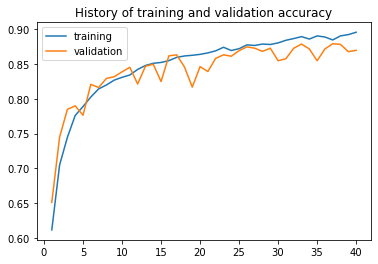

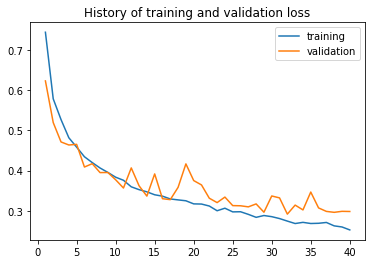

In [6]:
# Get the history of the training and validation accuracy and loss 
# from the history object returned by model.fit_generator().  Plot
# two graphs as described in the assignment PDF.  
#
# e.g. history.history['acc'] is an array of the training accuracy for each epoch.
%matplotlib inline

fig1 = plt.figure()
epoch = np.arange(1, 41, step = 1)
plt.plot(epoch, history.history['acc'])
plt.plot(epoch, history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('History of training and validation accuracy')

fig2 = plt.figure()
plt.plot(epoch, history.history['loss'])
plt.plot(epoch, history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('History of training and validation loss')

# Step 6: Predict Dog/Cat using the Trained Model

In [7]:
# Write your code to test the model here.

# Start by loading your model from disk that you previously saved so you don't have to run through
# the rest of the notebook just to test the model.  Use the load_model() function (already imported 
# above from keras.models).
model = load_model('solution/Cat-Dog-64x64-3layer-maxpooling-2.h5')

# Now load each of the test images and get a prediction (you'll know the ground truth because
# you'll know which folder (cats or dogs) each image comes from.  Determine the correct classification
# rate and print it out.  

count_right = 0
count_wrong = 0

# test for cats
path = os.path.join('.', 'dataset_jpg_square', 'test1', 'cats')
for root, dirs, files in os.walk(path):
    for filename in files:
        if filename[-4:] != '.jpg':
            continue
        test_image = image.load_img(os.path.join(path, filename), target_size = (64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict(test_image)
        if result < 0.5:
            count_right += 1
        else:
            count_wrong += 1

# test for dogs 
path = os.path.join('.', 'dataset_jpg_square', 'test1', 'dogs')
for root, dirs, files in os.walk(path):
    for filename in files:
        if filename[-4:] != '.jpg':
            continue
        test_image = image.load_img(os.path.join(path, filename), target_size = (64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict(test_image)
        if result > 0.5:
            count_right += 1
        else:
            count_wrong += 1

print("Classification rate: %f" % (count_right / (count_right + count_wrong)))

Classification rate: 0.769424
